# Stock Market Analysis

In this section we will get the stock market data from the most important tech company in the world. In order to do that we will connect to the yahoo api by using the python DataReader method. After the downloading of the data we will answer to some fondamental questions.


So let's start...

In [1]:
# For data analysis
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame

# For reading stock market from yhaoo
# See the link https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import pandas_datareader.data as web

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# To set a datetime
from datetime import datetime

# For divison
from __future__ import division


I set the date where i want to analyze the transactions

In [2]:
# If i want to analyze the data from today to one year ago I'll do this...

#End
end = datetime.now()
#Start
start = datetime(end.year -1, end.month, end.day)


Set up a list of company who I want to analyze

In [3]:
# For more informations: https://finance.yahoo.com/sector/technology
# The names in the lists are the simbols of the company

#USA tech company
us_comp=['AAPL','GOOG','AMZN','FB']

In [4]:
# With the following operation I collect all the stock marcket data of every company and store it 
# into a global variable as multiple data frame. Than I can call every single df with his name. 

for company in us_comp:
    globals()[company]= web.DataReader(company, "yahoo", start, end)
    

In [5]:
# Let's have a look at Facebook trading...
FB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,150.903532,151.946111,149.830397,151.017698,151.017698,1.699101e+07
std,19.248610,19.282648,19.085547,19.227044,19.227044,7.623901e+06
min,115.110001,116.480003,114.000000,115.050003,115.050003,3.069207e+06
25%,136.590004,137.292500,135.815002,136.672497,136.672497,1.257012e+07
50%,150.815002,151.955001,149.520005,150.610001,150.610001,1.497400e+07
75%,169.860001,171.137501,168.705001,169.930000,169.930000,1.890728e+07
max,182.559998,183.729996,181.990005,183.350006,183.350006,6.891070e+07


In [6]:
# General info
FB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-11-28 to 2017-11-27
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
FB.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-28,120.120003,121.690002,119.820000,120.410004,120.410004,18101300
2016-11-29,120.570000,122.099998,120.400002,120.870003,120.870003,18891000
2016-11-30,120.320000,121.790001,117.949997,118.419998,118.419998,30188900
2016-12-01,118.379997,118.449997,114.000000,115.099998,115.099998,43277000
2016-12-02,115.110001,116.480003,114.300003,115.400002,115.400002,25070400


Let's answer some question:

# 1) What was the change in price of the stock over time?

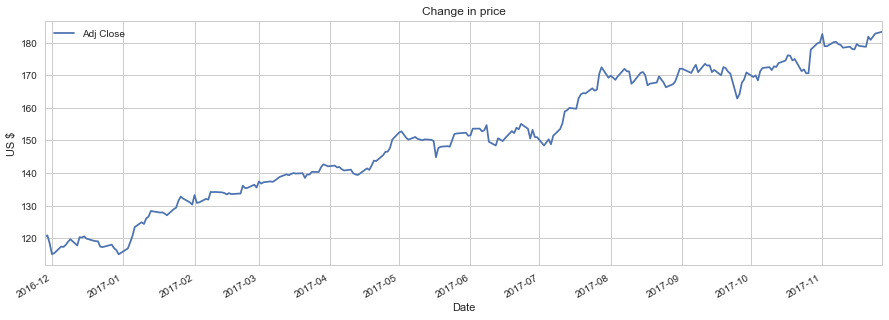

In [8]:
# Here we plot the "adj close" values using the pandas built in function
FB['Adj Close'].plot(legend=True,figsize=(15,5), title='Change in price')
plt.ylabel('US $')

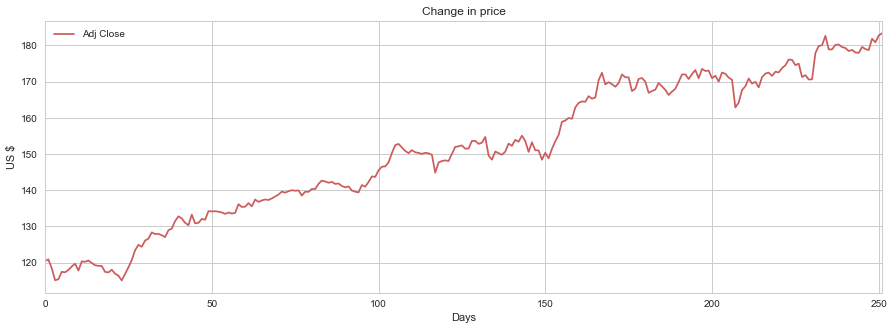

In [9]:
# Same plot using seaborn
plt.figure(figsize=(15,5))
plt.legend(['Adj Close'])
plt.title('Change in price')
plt.xlabel('Days')

sns.tsplot(FB['Adj Close'], value='US $',color='indianred', condition='Adj Close')


# 2) What was the daily return of the stock on average?

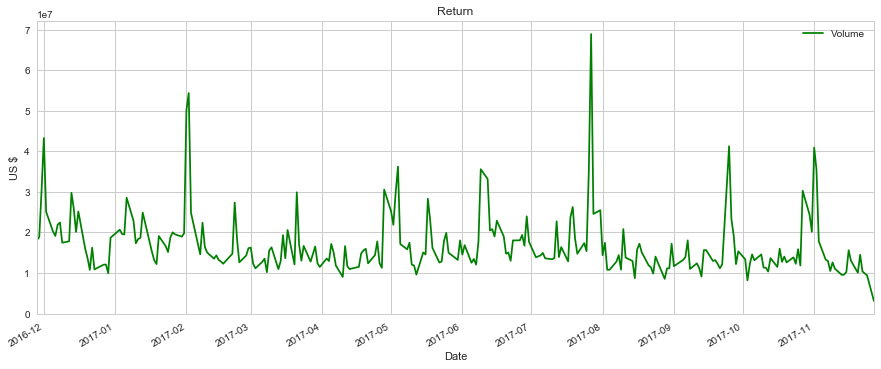

In [10]:
FB['Volume'].plot(legend=True, figsize=(15,6), title='Return', color='green')
plt.ylabel('US $')

# 3) What was the moving average of the various stocks?

We plot only the values about Facebook

To better understand what a moving average is visit the following link: https://www.investopedia.com/terms/m/movingaverage.asp

In [11]:
# Set a list of the days I want to calculate the average
ma_days=[10, 30, 50]

# Here i set three columns where it's calculated the moving average for each intervall in the list
for day in ma_days:
    column_name='Moving Avg %s days'%(str(day))
    FB[column_name] = pd.Series.rolling(FB['Adj Close'],window= day).mean()

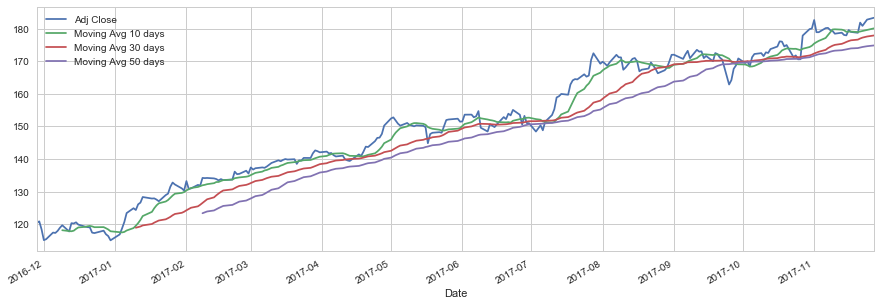

In [12]:
FB[['Adj Close','Moving Avg 10 days', 'Moving Avg 30 days', 'Moving Avg 50 days' ]].plot(subplots=False, figsize=(15,5))

In [13]:
# Here we calculate the percent change for the 'Adj Close' column (the daily return)
# For more explenation about the percent change watch this video: https://www.youtube.com/watch?v=MSXGbXJiTt4

FB['Daily Return']= FB['Adj Close'].pct_change()

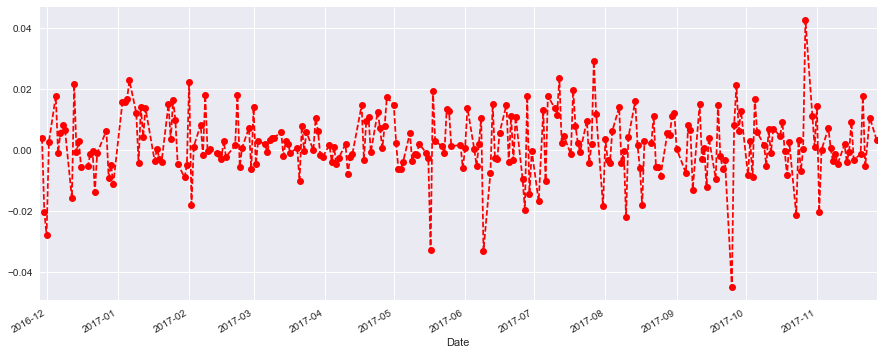

In [14]:
# Change the style of the grid
sns.set_style('darkgrid')

# Plot the column of the percent change
FB['Daily Return'].plot(figsize=(15,6), linestyle='--', marker='o', color='r')

Nice! Now let's see how is the distribution of the "Daily Return" values.

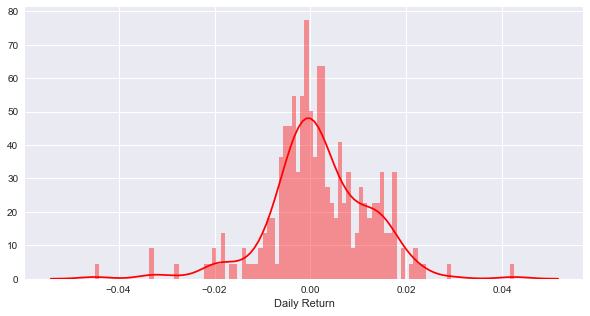

In [15]:
# Plotting the Facebook distribution of the daily return
plt.figure(figsize=(10,5))
sns.distplot(FB['Daily Return'].dropna(), color='red', bins=100)

Woow! What a nice insight! Look how the average of the return for the Facebook stock action is approximatly to zero.

Well, if we bought one stock action at the beginning of Jennuary we have earned the following amount: 

In [16]:
FB['Daily Return'].sum()

0.43471936447686543

# 4) What was the correlation between different stock's closing prices?

In order to answer the question above we have to create a data frame with the "adj close" column for every company.

In [17]:
# For every company we grap only the "Adj Close" column
closingDF = web.DataReader(['AAPL','GOOG','AMZN','FB'], 'yahoo',start, end)['Adj Close']

In [18]:
closingDF[['AAPL','GOOG','AMZN','FB']].head()

,AAPL,GOOG,AMZN,FB
Date,,,,
2017-11-27,174.929993,1048.900024,1209.725952,183.360001
2017-11-24,174.970001,1040.609985,1186.000000,182.779999
2017-11-22,174.960007,1035.959961,1156.160034,180.869995
2017-11-21,173.139999,1034.489990,1139.489990,181.860001
2017-11-20,169.979996,1018.380005,1126.310059,178.740005


In [19]:
# Here we calculate the daily return
returnDF = closingDF.pct_change()
returnDF.head(5)

,AAPL,AMZN,FB,GOOG
Date,,,,
2017-11-27,NaN,NaN,NaN,NaN
2017-11-24,0.000229,-0.019613,-0.003163,-0.007904
2017-11-22,-0.000057,-0.025160,-0.010450,-0.004469
2017-11-21,-0.010402,-0.014418,0.005474,-0.001419
2017-11-20,-0.018251,-0.011567,-0.017156,-0.015573


Now that we have the df we can look at the distribution of every return for each company.

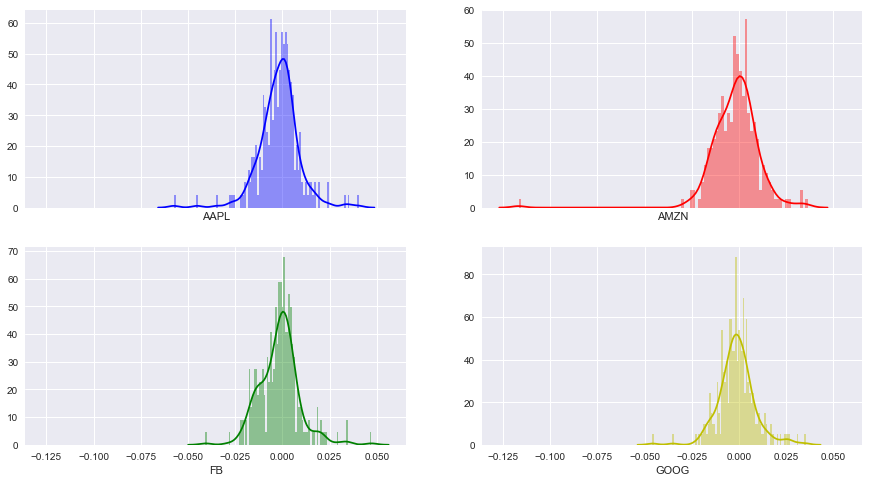

In [20]:
# Setting of the figure 
f,axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Plotting every company distribution
sns.distplot(returnDF['AAPL'].dropna(), color='b', ax=axes[0,0], bins=100)

sns.distplot(returnDF['AMZN'].dropna(), color='r', ax=axes[0,1], bins=100)

sns.distplot(returnDF['FB'].dropna(), color='g', ax=axes[1,0], bins=100)

sns.distplot(returnDF['GOOG'].dropna(), color='y', ax=axes[1,1], bins=100)

Now we analyze the correlation between the return of each company. But first let's compare the correlation between the same company. 

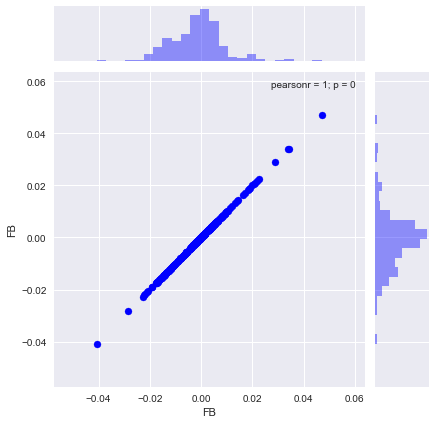

In [21]:
sns.jointplot('FB','FB', returnDF, kind='scatter',color='blue')

As we can see there is a perfect correlation for the same distribution value, but let's compare different values...

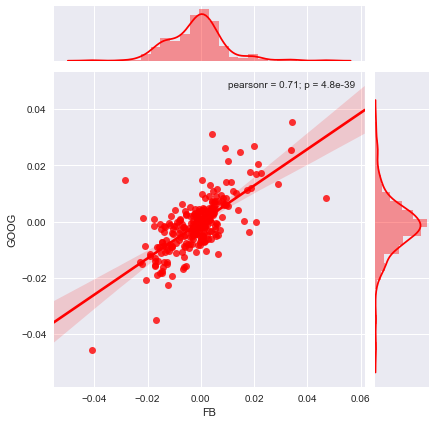

In [22]:
#Let's compare FB and Google return distribution using the seaborn's joinplot
sns.jointplot('FB','GOOG', returnDF, kind='reg',color='red')

The correlation between Facebook and google return distribution is p=0.71 it means that is quite pretty strong.

# 5) What was the correlation between different stocks' daily returns?

In order to answer the question we can use the "pairplot" method on our df. In this case we can have a view on all the possible correlation plots. 

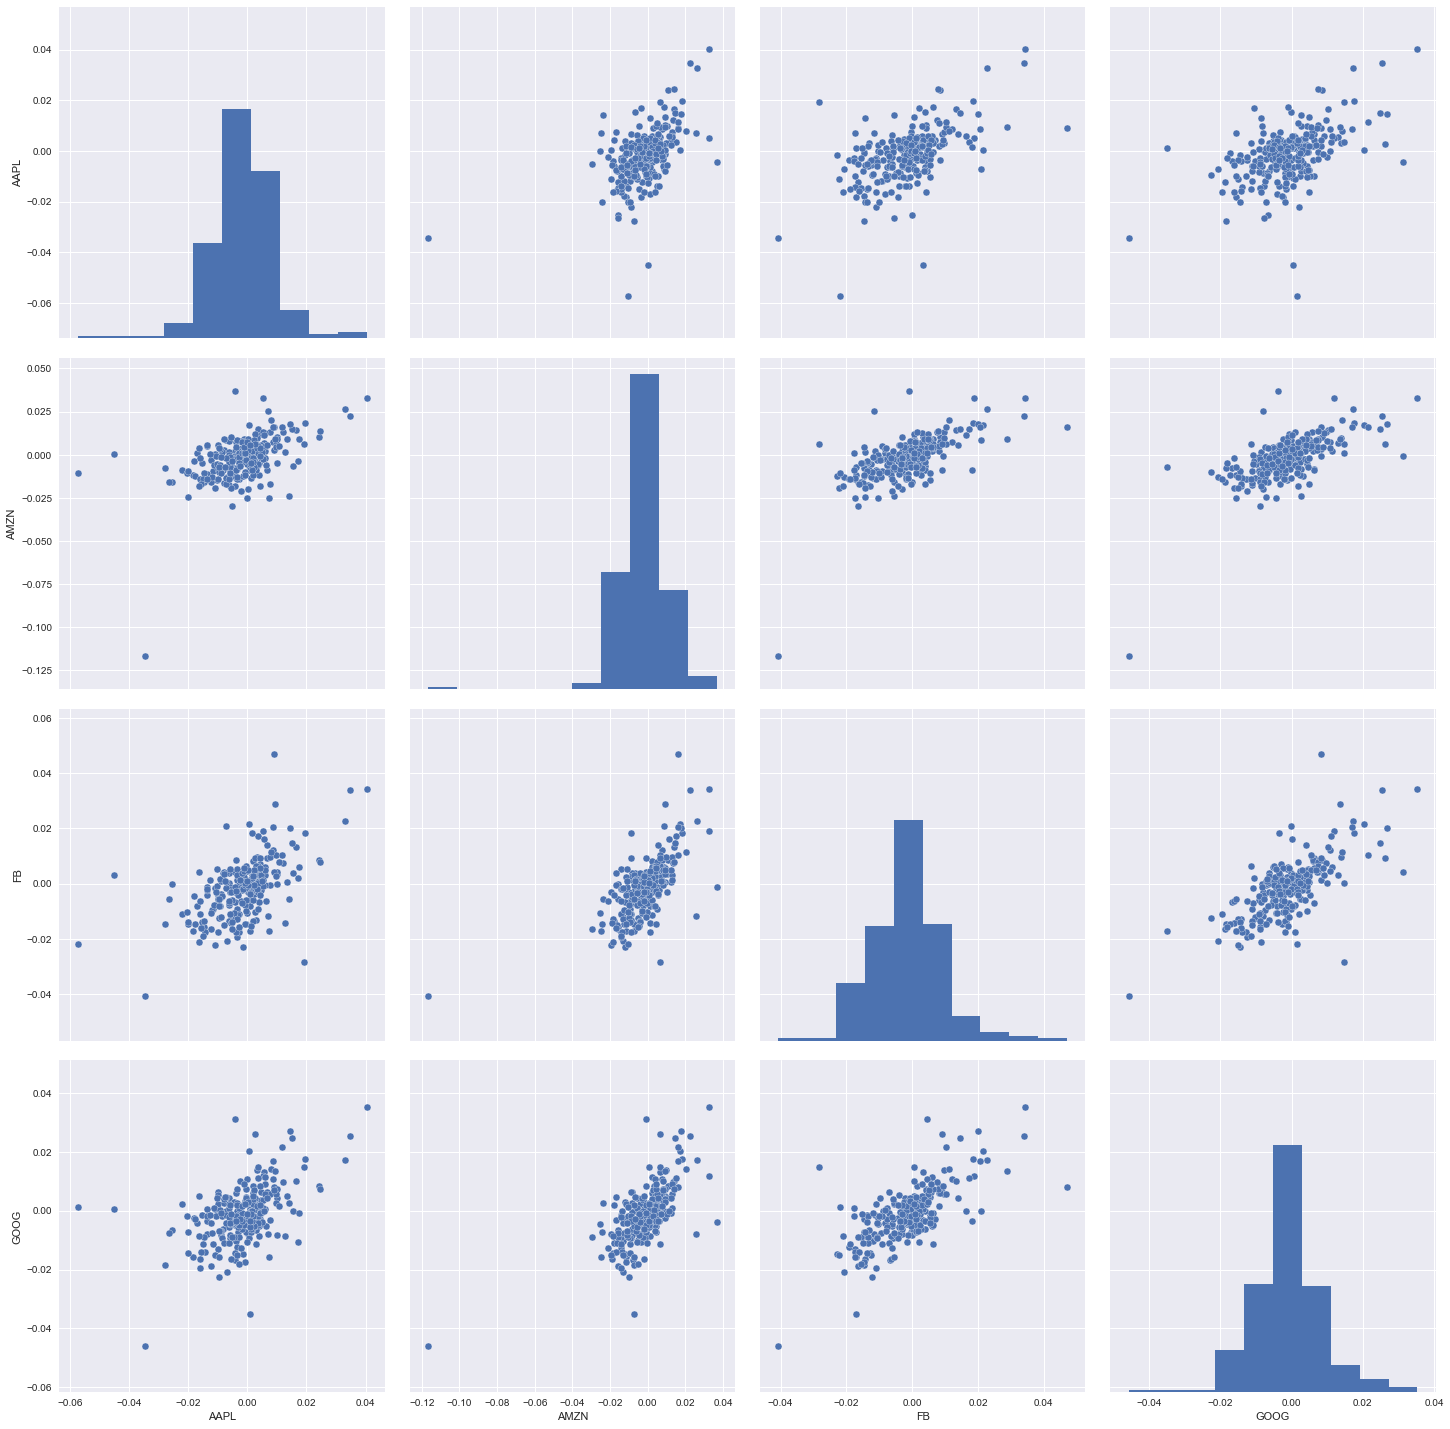

In [23]:
sns.set_style('darkgrid')
sns.pairplot(returnDF.dropna(),size=5)

Well the pairplot give us a first glance on the daily correlation for every company. In the case we want to get a better visualization we can use the "PairGrid" method. With the pairgrid method we can decide what kind of plot style the upper triangle the lower triangle and the diagonal should have.

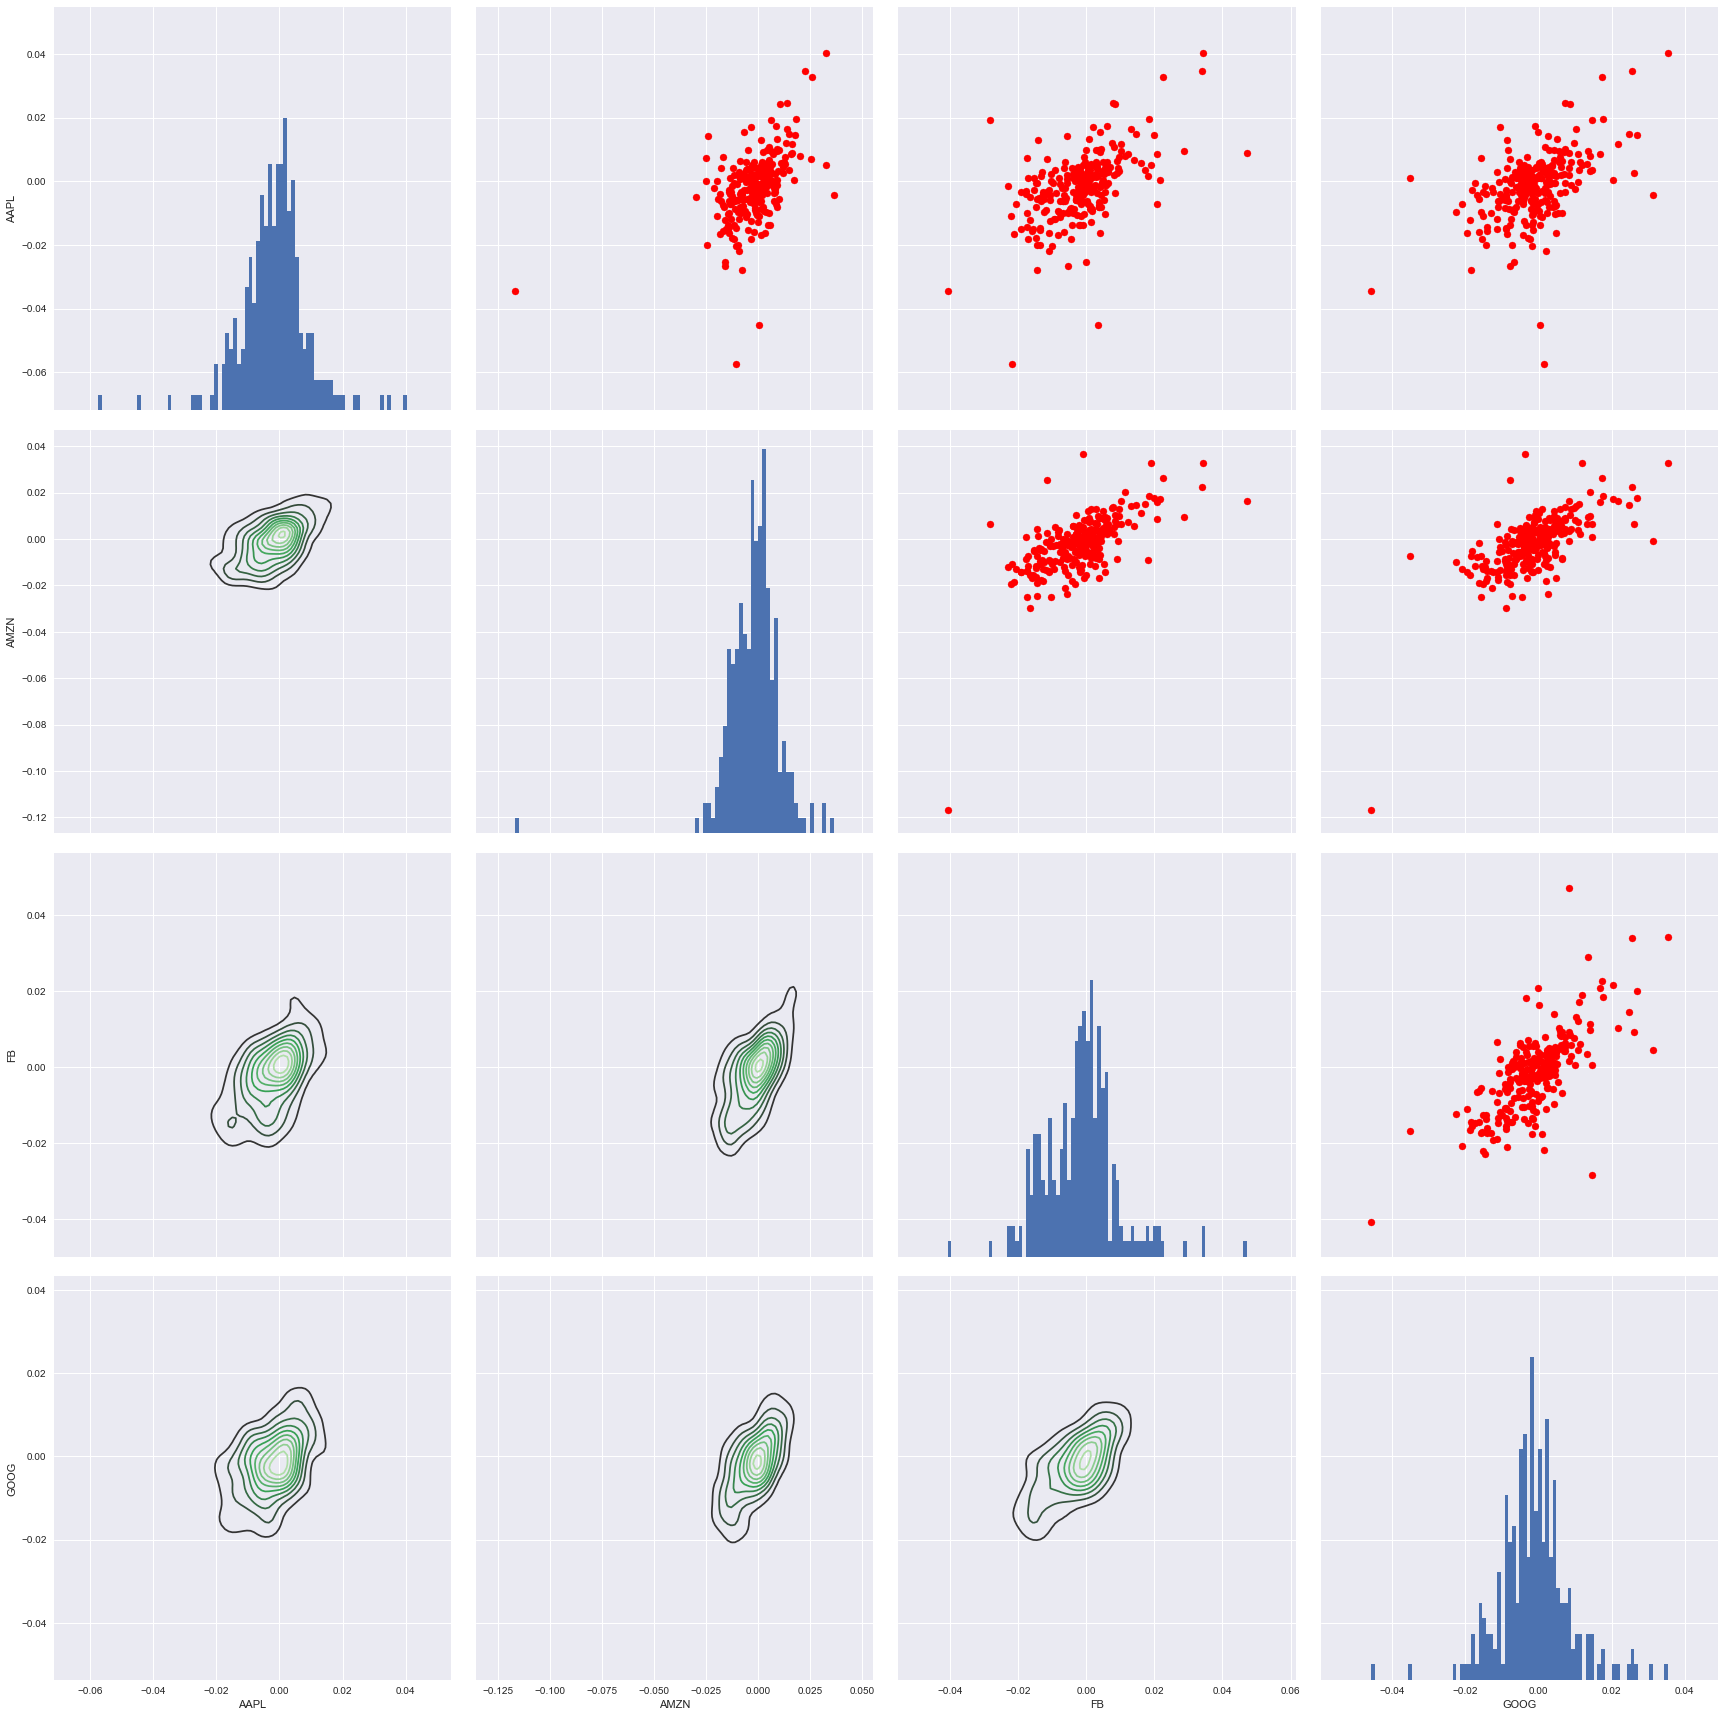

In [24]:
# Set up our figure by call PairPLot on the DataFrame
returns_fig = sns.PairGrid(returnDF.dropna(),size= 6)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (Green)
returns_fig.map_lower(sns.kdeplot,cmap='Greens_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=80)

If we want a more precise understanding about the correlation we can also use the heatmap visualization

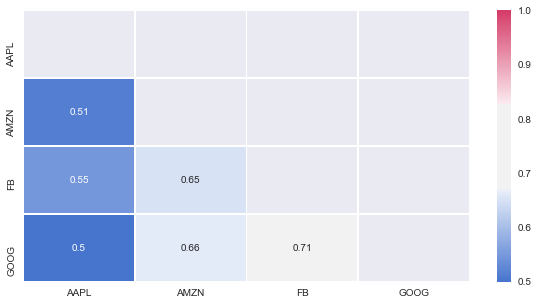

In [25]:
# Calculatio of the correlation
corr = returnDF.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] =True

# Setting of the aesthetic 
sns.set_style('darkgrid')

# Setting the figure size
plt.figure(figsize=(10,5))

# Plotting
sns.heatmap(corr, cmap=(sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True)), annot=True, mask=mask, linewidths=.5)

What a nice result! We can see that all the company stocks return are positively corralated, but It looks like "FB" and "Google" have the stronger correlation.

In the case we want to know how is the return of each company until now...

In [26]:
print 'Google Total Return: ', returnDF['GOOG'].sum()
print 'Facebook Total Return: ', returnDF['FB'].sum()
print 'Amazon Total Return: ', returnDF['AMZN'].sum()
print 'Apple Total Return: ', returnDF['AAPL'].sum()

Google Total Return:  -0.299485642866
Facebook Total Return:  -0.406327710235
Amazon Total Return:  -0.434777707508
Apple Total Return:  -0.450754503999


That's bad... All are negative! It means that if we have invested in those companies we had a negative return. If we want to better understand how much we would loose It schould be better to answer at the next question. 

# 6) How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify the risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns. Greater the value of the standard deviationis more the risk is high.

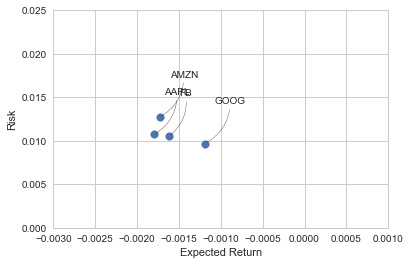

In [27]:
# Setting the style of the figure's background
sns.set_style('whitegrid')

# Creation of a new df without null values
returnDF = returnDF.dropna()

# Creation of the scatter plot (the s parameter is the area of the dots).
# The expected return is the mean value af all daily return.
plt.scatter(returnDF.mean(), returnDF.std(), alpha=1, s=60)

plt.ylim([-0.00,0.025])
plt.xlim([-0.003,0.001])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# With the following operation we are going to annotate each dot of the scatter plot 
# for more information visit the following link: https://matplotlib.org/users/annotations_guide.html
for name, xmean, ystdv in zip(returnDF.columns, returnDF.mean(), returnDF.std()):
    plt.annotate(name, 
                 xy=(xmean, ystdv), xytext=(10, 40), 
                 textcoords = 'offset points',  
                  arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))


Considering the plot above we can see that Amazon, Apple and FB are clustered together while google is a little bit further. At a first sight it seems that google stock actions are less risky. 

# Value the risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

So let's first plot the daily return distribution for each company, than we will calculate quantile for each one.

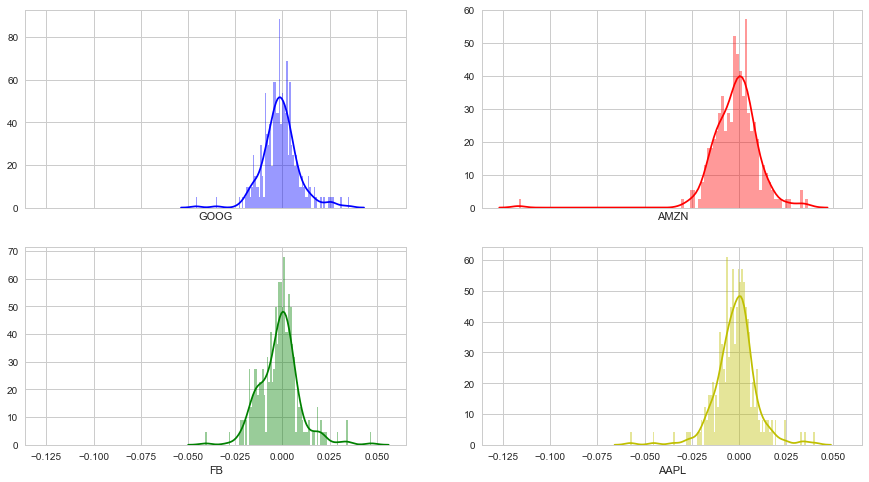

In [28]:
# Setting of the figure 
f,axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

# Plotting every company distribution
sns.distplot(returnDF['GOOG'].dropna(), color='b', ax=axes[0,0], bins=100)
#plt.annotate(returnDF['AMZN'].quantile(0.05), xy=(10, 50), xytext=(10, 50))

sns.distplot(returnDF['AMZN'].dropna(), color='r', ax=axes[0,1], bins=100)

sns.distplot(returnDF['FB'].dropna(), color='g', ax=axes[1,0], bins=100)

sns.distplot(returnDF['AAPL'].dropna(), color='y', ax=axes[1,1], bins=100)

Ok now that we have all the return plots let's numerically quantify the risk probability.

In [29]:
print 'Amazon Risk: ', returnDF['AMZN'].quantile(0.05)
print 'Fb Risk: ', returnDF['FB'].quantile(0.05)
print 'Google Risk: ', returnDF['GOOG'].quantile(0.05)
print 'Apple Risk: ', returnDF['AAPL'].quantile(0.05)

Amazon Risk:  -0.017870663722
Fb Risk:  -0.017293712566
Google Risk:  -0.0157138361519
Apple Risk:  -0.0173417248815


Nice! What does our results means? The most risky company is Apple followed by Facebook. The 0.05 empirical quantile of daily returns for the Apple company is at -0.017. That means that with 95% confidence, our worst daily loss will not exceed 1.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.017 * 1,000,000 = $17,000.
For more information se the link:https://www.investopedia.com/articles/04/092904.asp

# 7) How can we attempt to predict future stock behavior?

Here we use the Monte Carlo method.
See the link: https://www.investopedia.com/articles/07/montecarlo.asp

In [30]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = returnDF.mean()['FB']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = returnDF.std()['FB']

In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [32]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-28,760.000000,779.530029,759.799988,768.239990,768.239990,2188200
2016-11-29,771.530029,778.500000,768.239990,770.840027,770.840027,1616600
2016-11-30,770.070007,772.989990,754.830017,758.039978,758.039978,2392900
2016-12-01,757.440002,759.849976,737.025024,747.919983,747.919983,3017900
2016-12-02,744.590027,754.000000,743.099976,750.500000,750.500000,1452500


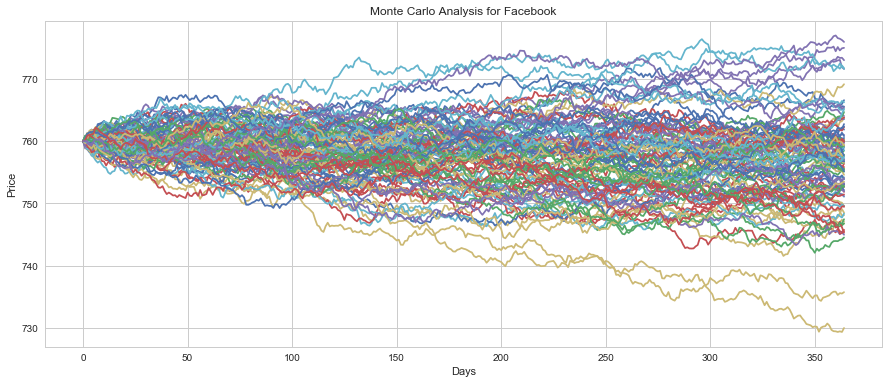

In [33]:
# Get start price from FB.head()
start_price = 760.00
plt.figure(figsize=(15,6))
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Facebook')

# Thanks for your attention!